In [ ]:
import torch
from torchvision import transforms

import torch.optim as optim

from model import Net2, modelsummary
from utils import build_mnist, Trainer, plot_sampledata, plot_history, evaluate_model

In [ ]:
# CUDA?
torch.manual_seed(1)
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [ ]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        transforms.RandomApply(
            [
                transforms.CenterCrop(22),
            ],
            p=0.1,
        ),
        transforms.Resize((28, 28)),
        transforms.RandomRotation((-15.0, 15.0), fill=0),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [ ]:
batch_size = 256

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(set="train", transforms=train_transforms, **kwargs)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

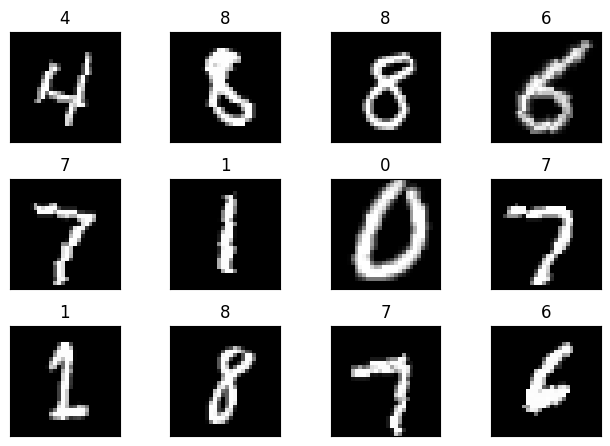

In [ ]:
plot_sampledata(train_loader)

In [ ]:
Net2()(torch.rand(1, 1, 28, 28))

tensor([[-2.3026, -2.3026, -2.3026, -2.3026, -2.3026, -2.3026, -2.3026, -2.3026,
         -2.3026, -2.3026]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
modelsummary(Net2(), device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 28, 28]              36
              ReLU-2            [-1, 4, 28, 28]               0
       BatchNorm2d-3            [-1, 4, 28, 28]               8
         Dropout2d-4            [-1, 4, 28, 28]               0
            Conv2d-5            [-1, 8, 26, 26]             288
              ReLU-6            [-1, 8, 26, 26]               0
       BatchNorm2d-7            [-1, 8, 26, 26]              16
         Dropout2d-8            [-1, 8, 26, 26]               0
         MaxPool2d-9            [-1, 8, 13, 13]               0
           Conv2d-10            [-1, 4, 13, 13]              32
             ReLU-11            [-1, 4, 13, 13]               0
      BatchNorm2d-12            [-1, 4, 13, 13]               8
        Dropout2d-13            [-1, 4, 13, 13]               0
           Conv2d-14           [-1, 16,

In [ ]:
num_epochs = 20
model = Net2(drop=0.01).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# scheduler = None

trainer = Trainer(model, device, optimizer)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)
    if scheduler:
        scheduler.step()

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 1


Train: Loss=0.2274 Batch_id=234 Accuracy=84.52: 100%|██████████| 235/235 [00:50<00:00,  4.66it/s]


Test set: Average loss: 0.0840, Accuracy: 9785/10000 (97.85%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 2


Train: Loss=0.0962 Batch_id=234 Accuracy=96.75: 100%|██████████| 235/235 [00:52<00:00,  4.44it/s]


Test set: Average loss: 0.0459, Accuracy: 9871/10000 (98.71%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 3


Train: Loss=0.1091 Batch_id=234 Accuracy=97.48: 100%|██████████| 235/235 [00:53<00:00,  4.39it/s]


Test set: Average loss: 0.0341, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 4


Train: Loss=0.1382 Batch_id=234 Accuracy=97.99: 100%|██████████| 235/235 [00:51<00:00,  4.53it/s]


Test set: Average loss: 0.0276, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 5


Train: Loss=0.0648 Batch_id=234 Accuracy=98.01: 100%|██████████| 235/235 [00:52<00:00,  4.50it/s]


Test set: Average loss: 0.0256, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 6


Train: Loss=0.0650 Batch_id=234 Accuracy=98.26: 100%|██████████| 235/235 [00:52<00:00,  4.47it/s]


Test set: Average loss: 0.0248, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 7


Train: Loss=0.0473 Batch_id=234 Accuracy=98.32: 100%|██████████| 235/235 [00:53<00:00,  4.40it/s]


Test set: Average loss: 0.0281, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 8


Train: Loss=0.0287 Batch_id=234 Accuracy=98.34: 100%|██████████| 235/235 [00:51<00:00,  4.52it/s]


Test set: Average loss: 0.0243, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 9


Train: Loss=0.0396 Batch_id=234 Accuracy=98.43: 100%|██████████| 235/235 [00:51<00:00,  4.56it/s]


Test set: Average loss: 0.0250, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 10


Train: Loss=0.0188 Batch_id=234 Accuracy=98.53: 100%|██████████| 235/235 [00:54<00:00,  4.33it/s]


Test set: Average loss: 0.0202, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 11


Train: Loss=0.0088 Batch_id=234 Accuracy=98.55: 100%|██████████| 235/235 [00:52<00:00,  4.47it/s]


Test set: Average loss: 0.0230, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 12


Train: Loss=0.0143 Batch_id=234 Accuracy=98.64: 100%|██████████| 235/235 [00:50<00:00,  4.64it/s]


Test set: Average loss: 0.0215, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 13


Train: Loss=0.1361 Batch_id=234 Accuracy=98.67: 100%|██████████| 235/235 [00:49<00:00,  4.80it/s]


Test set: Average loss: 0.0179, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 14


Train: Loss=0.0621 Batch_id=234 Accuracy=98.68: 100%|██████████| 235/235 [00:50<00:00,  4.67it/s]


Test set: Average loss: 0.0198, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 2.0000e-02.
Epoch 15


Train: Loss=0.0457 Batch_id=234 Accuracy=98.64: 100%|██████████| 235/235 [00:49<00:00,  4.78it/s]


Test set: Average loss: 0.0174, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 16


Train: Loss=0.0333 Batch_id=234 Accuracy=98.93: 100%|██████████| 235/235 [00:48<00:00,  4.80it/s]


Test set: Average loss: 0.0162, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 17


Train: Loss=0.0482 Batch_id=234 Accuracy=98.89: 100%|██████████| 235/235 [00:50<00:00,  4.67it/s]


Test set: Average loss: 0.0163, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 18


Train: Loss=0.0099 Batch_id=234 Accuracy=98.97: 100%|██████████| 235/235 [00:48<00:00,  4.81it/s]


Test set: Average loss: 0.0159, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 19


Train: Loss=0.0958 Batch_id=234 Accuracy=98.97: 100%|██████████| 235/235 [00:48<00:00,  4.82it/s]


Test set: Average loss: 0.0160, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 20


Train: Loss=0.0353 Batch_id=234 Accuracy=99.02: 100%|██████████| 235/235 [00:48<00:00,  4.88it/s]


Test set: Average loss: 0.0155, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 2.0000e-03.


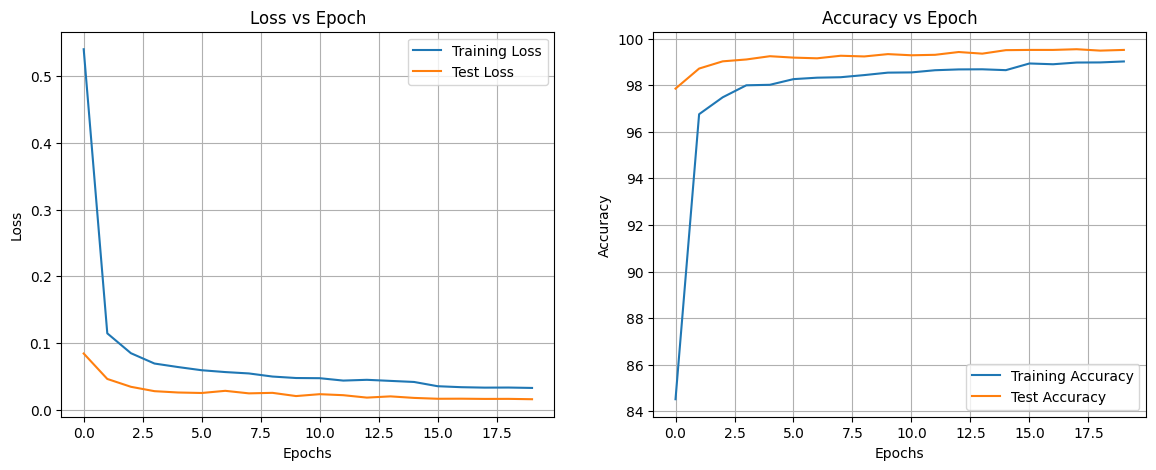

In [ ]:
plot_history(
    trainer.train_losses, trainer.train_acc, trainer.test_losses, trainer.test_acc
)

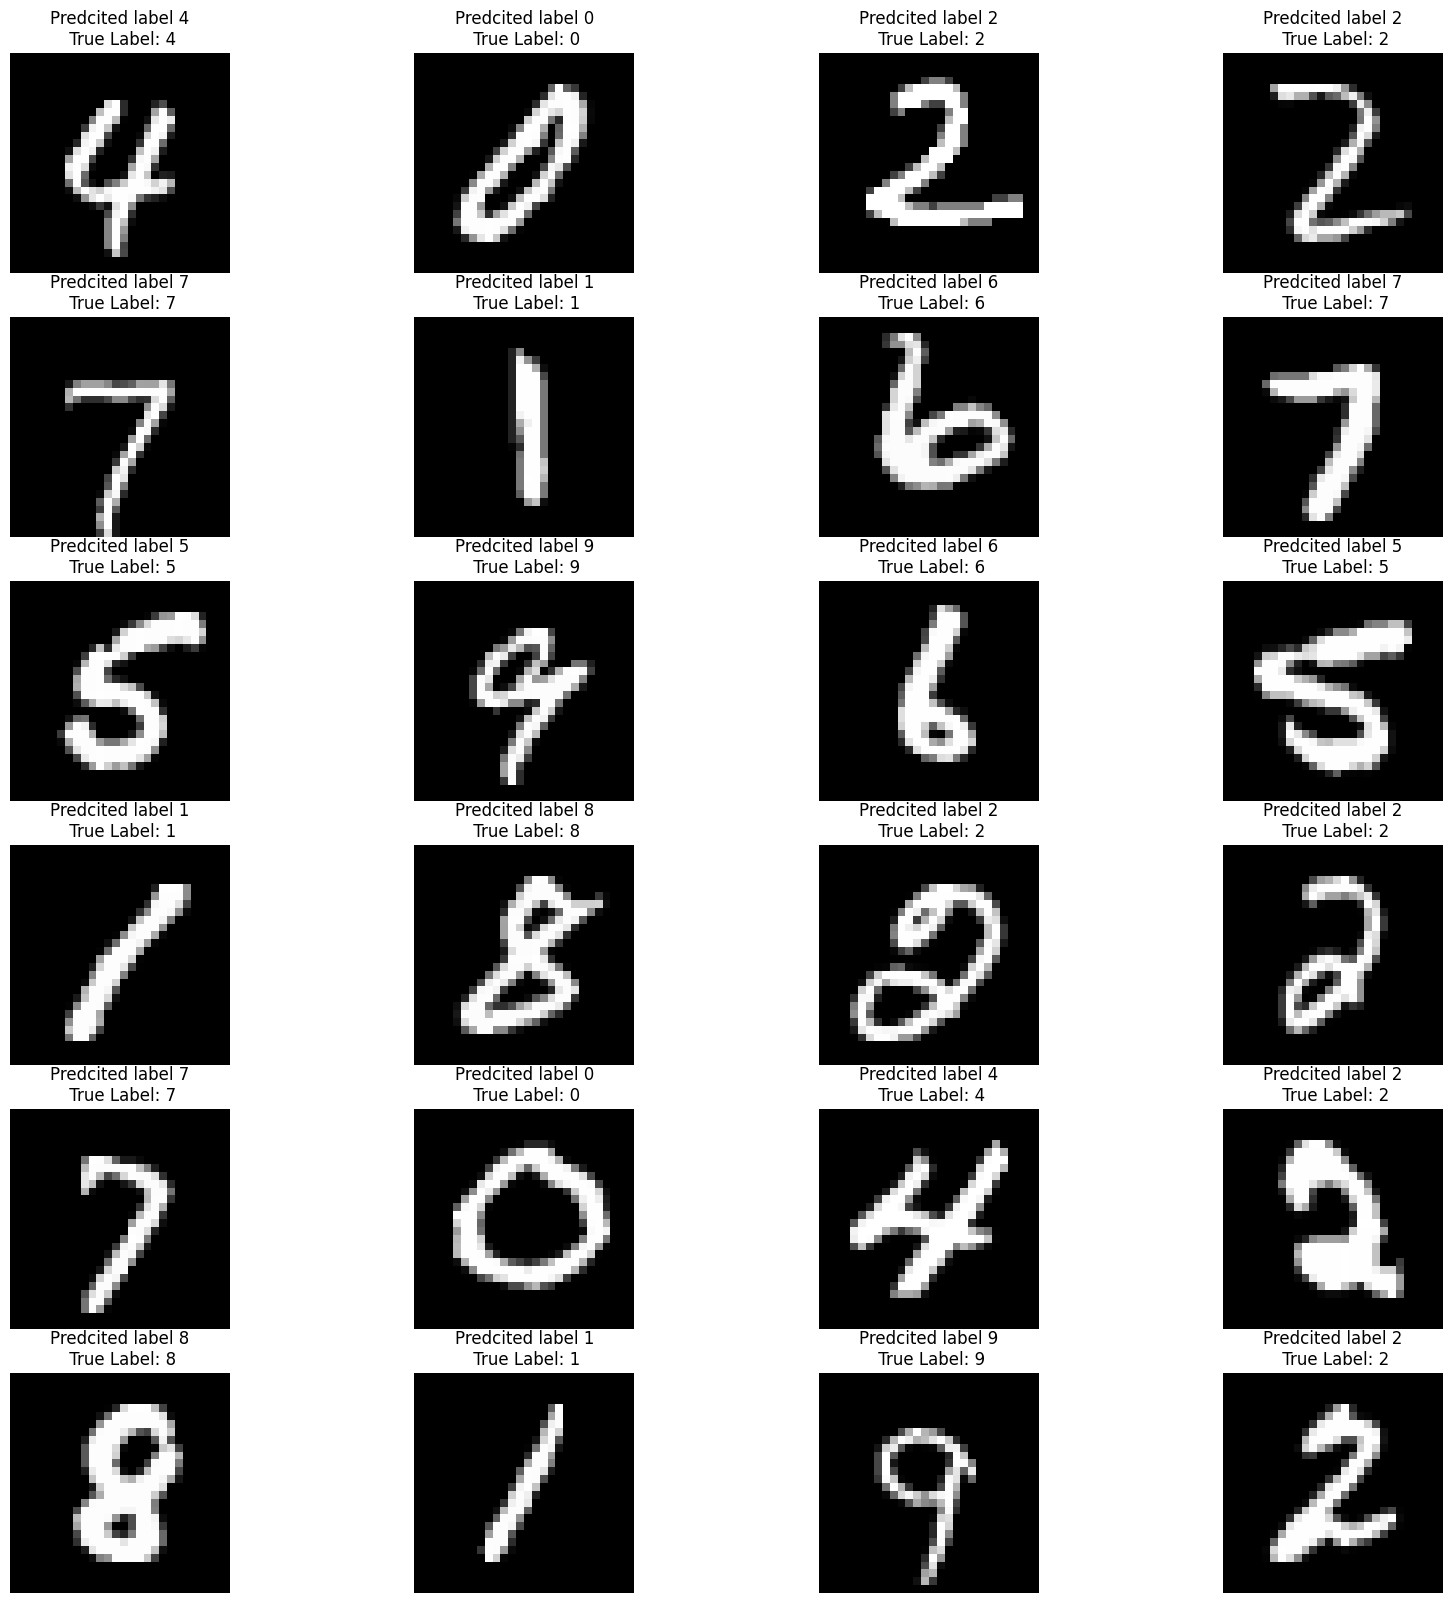

In [ ]:
evaluate_model(trainer.model, test_loader, device)